In [1]:
import utils
import config
import os
import numpy as np
import pickle
import pandas as pd

In [2]:
if __name__ == "__main__":
    df = utils.run_distance_scenario()

In [3]:
df

,distance,recording,target_bin,rr_radar,hr_radar,hr_ref,br_ref,HR_abs_err,RR_abs_err
0,40 cm,1,13,9.3,84.878049,83.733333,9.5,1.144715,0.2
1,40 cm,2,13,9.0,82.536585,81.229508,10.0,1.307077,1.0
2,40 cm,3,13,9.0,77.414634,83.300000,9.0,5.885366,0.0
3,40 cm,4,13,8.4,84.000000,82.295082,9.0,1.704918,0.6
4,80 cm,1,21,9.0,81.658537,86.245902,10.0,4.587365,1.0
5,80 cm,2,21,9.0,82.097561,81.229508,9.0,0.868053,0.0
6,80 cm,3,21,9.1,79.317073,82.901639,9.0,3.584566,0.1
7,80 cm,4,21,6.0,81.219512,81.650000,9.0,0.430488,3.0
8,120 cm,1,30,9.3,75.219512,85.262295,9.0,10.042783,0.3
9,120 cm,2,30,7.4,78.000000,83.918033,9.0,5.918033,1.6


In [4]:
mean_RR_error=df.RR_abs_err.mean()
mean_hr_error=df.HR_abs_err.mean()
print(f"Mean RR error: {mean_RR_error:.2f} bpm")
print(f"Mean HR error: {mean_hr_error:.2f} bpm")

Mean RR error: 0.59 bpm
Mean HR error: 3.66 bpm


In [5]:
import matplotlib.pyplot as plt
def visualize_target_bin_selection(dist="40 cm", rec="1"):
    radar_path = os.path.join(config.BASE_RADAR, dist, rec, "data_Raw_0.bin")
    mem = utils.open_memmap(radar_path)

    range_map = utils.build_range_map(mem)

    roi = utils.find_motion_based_roi(range_map)
    if roi is None:
        print("Nie wykryto ROI")
        return

    roi_start, roi_end = roi
    target_bin = utils.pick_target_bin_motion(mem)

    rm_dc = range_map - range_map.mean(axis=0, keepdims=True)
    motion_profile = np.var(rm_dc, axis=0)
    motion_profile /= np.max(motion_profile)

    print(f"ROI (klatka piersiowa): biny {roi_start}–{roi_end}")
    print(f"target_bin = {target_bin}")

    fig, axs = plt.subplots(1, 3, figsize=(18, 5))

    im = axs[0].imshow(range_map.T, aspect="auto", origin="lower")
    axs[0].axhspan(roi_start, roi_end, color="cyan", alpha=0.3, label="ROI")
    axs[0].axhline(target_bin, color="red", linewidth=2, label="target_bin")
    axs[0].set_title("Mapa zasięgu (Range map)")
    axs[0].set_xlabel("Czas (ramki)")
    axs[0].set_ylabel("Bin odległości")
    axs[0].legend()
    plt.colorbar(im, ax=axs[0], label="Amplituda |FFT|")

    axs[1].plot(motion_profile, color="black")
    axs[1].axvspan(roi_start, roi_end, color="cyan", alpha=0.3)
    axs[1].axvline(target_bin, color="red", linestyle="--")
    axs[1].set_title("Profil ruchu (wariancja w czasie)")
    axs[1].set_xlabel("Bin odległości")
    axs[1].set_ylabel("Znormalizowana energia ruchu")
    axs[1].grid(True)

    axs[2].imshow(
        range_map[:, roi_start:roi_end].T,
        aspect="auto",
        origin="lower"
    )
    axs[2].set_title("Zoom na ROI (klatka piersiowa)")
    axs[2].set_xlabel("Czas (ramki)")
    axs[2].set_ylabel("Bin odległości")

    plt.tight_layout()
    plt.show()

ROI (klatka piersiowa): biny 17–25
target_bin = 21


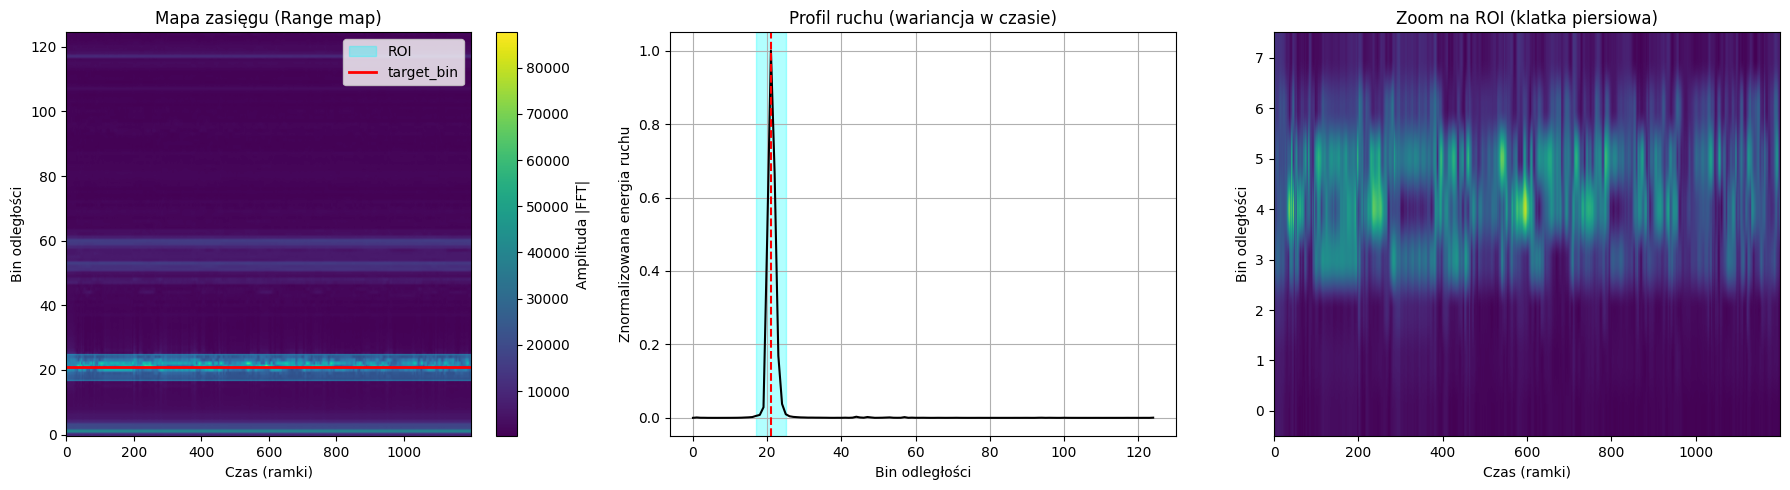

In [6]:
visualize_target_bin_selection("80 cm", "4")